In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Додаткові завдання №2

## 1 Візуалізація емпіричної імовірності
Побудуйте графік залежності емпіричної імовірності випадіння герба (HEAD) від кількості підкидань чесної монети (симуляцій).

**Зауваження.** Завдання передбачає використання бібліотеки [Matplotlib](https://matplotlib.org/).

In [11]:
# Місце для Вашого коду
def proba_of_H(trials):
    tosses = np.random.randint(low=0, high=2, size=(trials))
    return list(tosses).count(1)/trials

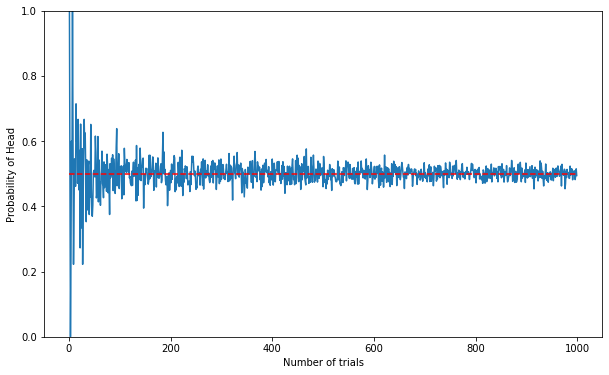

In [12]:
x = list(range(1, 1000))
y = list(map(proba_of_H, x))
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel('Number of trials')
plt.ylabel('Probability of Head')
plt.ylim([0, 1])
plt.plot(x, [0.5]*len(x), 'r--')
plt.show()


## 2 Найбільше число
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що максимальне число після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $x\_max$, для таких параметрів:
- $f = \{ 2, 5, 8 \}, x\_max = 8$
- $f = \{ 3, 4 \}, x\_max = 2$
- $f = \{ 2, 5, 7, 3 \}, x\_max = 3$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \max\limits_{1 \leq i \leq n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = x\_max \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 8, 3 \}$ вводиться $x\_max < 1$ або $x\_max > 8$.

In [13]:
# Місце для Вашого коду
def max_number(f, x_max):
    # f - <list> of cubes
    # x_max - maximal number

    if x_max < 1 or x_max > max(f):
        return 0

    conducive = 0
    general = 0
    for cube in f:
        general += cube
        if x_max <= cube:
            conducive += 1


    return conducive/general

In [14]:
def max_number_empirical(f, x_max, k=100000):
    # f - <list> of cubes
    # x_max - maximal number
    # k - number of trials
    tosses = np.concatenate([np.random.randint(low=1, high=cube + 1, size=(k, 1)) for cube in f], axis=1)
    maxes = list(np.apply_along_axis(max, 1, tosses)).count(x_max)
    return maxes/k

In [15]:
for f, x_max in [({2, 5, 8}, 8), ({3, 4}, 2), ({2, 5, 7, 3}, 3)]:
    print('For f = {}, x_max = {}:'.format(f, x_max))
    print('\ttheoretical -', max_number(f, x_max))
    print('\tempirical -', max_number_empirical(f, x_max))


For f = {8, 2, 5}, x_max = 8:
	theoretical - 0.06666666666666667
	empirical - 0.12487
For f = {3, 4}, x_max = 2:
	theoretical - 0.2857142857142857
	empirical - 0.25206
For f = {2, 3, 5, 7}, x_max = 3:
	theoretical - 0.17647058823529413
	empirical - 0.1826


## 3 Сума чисел
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що сума чисел після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $s$, для таких параметрів:
- $f = \{ 3, 4, 5 \}, s = 13$
- $f = \{ 2, 2 \}, s = 3$
- $f = \{ 3, 4, 5 \}, s = 7$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \sum\limits_{i = 1}^{n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = s \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 6, 3 \}$ вводиться $s < 3$ або $s > 13$.

In [16]:
# Місце для Вашого коду
def count_variants(f, summ):
    # f - <list> of cubes
    # summ - sum of numbers on cubes

    counter = 0
    def _count_variants(f, summ):
        nonlocal counter
        if len(f) == 1 and 1 <= summ <= f[0]:
            counter += 1
            return
        for i in range(1, f[0] + 1):
            if 0 < (summ - i) / (len(f) - 1) <= f[0]:
                _count_variants(f[1:], summ - i)
    _count_variants(f, summ)
    return counter

# test
print(count_variants([3, 3], 3))

2


In [17]:
def summ_s(f, summ):
    return count_variants(f, summ)/(np.prod(np.array(f)))


def summ_s_empirical(f, summ, k=100000):
    # f - <list> of cubes
    # x_max - maximal number
    # k - number of trials
    tosses = np.concatenate([np.random.randint(low=1, high=cube + 1, size=(k, 1)) for cube in f], axis=1)
    sums = list(np.apply_along_axis(sum, 1, tosses)).count(summ)
    return sums/k

In [18]:
for f, s in [([3, 4, 5], 13), ([2, 2], 3), ([3, 4, 5], 7)]:
    print('For f = {}, s = {}:'.format(f, s))

    print('\ttheoretical - {}'.format(summ_s(f, s)))
    print('\tempirical - {}'.format(summ_s_empirical(f, s)))

For f = [3, 4, 5], s = 13:
	theoretical - 0.0
	empirical - 0.0
For f = [2, 2], s = 3:
	theoretical - 0.5
	empirical - 0.50204
For f = [3, 4, 5], s = 7:
	theoretical - 0.16666666666666666
	empirical - 0.1829
